# Plotting in Napari
In this notebook we demonstrate how to load images, labels and corresponding measurements into a Napari viewer and how to open the Plotter widget of the napari-clusters-plotter to plot specific properties.

In [1]:
from napari_clusters_plotter._dock_widget import PlotterWidget

from skimage.io import imread
from skimage.measure import label
import napari_skimage_regionprops as nsr
import napari

We initially load some example image and segment it.

In [2]:
image = imread("../example_data/blobs.tif")

In [3]:
labels = label(image > 128)

Next we perform quantiative measurements and store them in a dictionary.

In [4]:
statistics = nsr.regionprops_table(image, labels, size=True, intensity=True)

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity']


## Viewing data in Napari
We now open a Napari viewer, show the image, the corresponding label image and the quantiative measurements in a table.

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


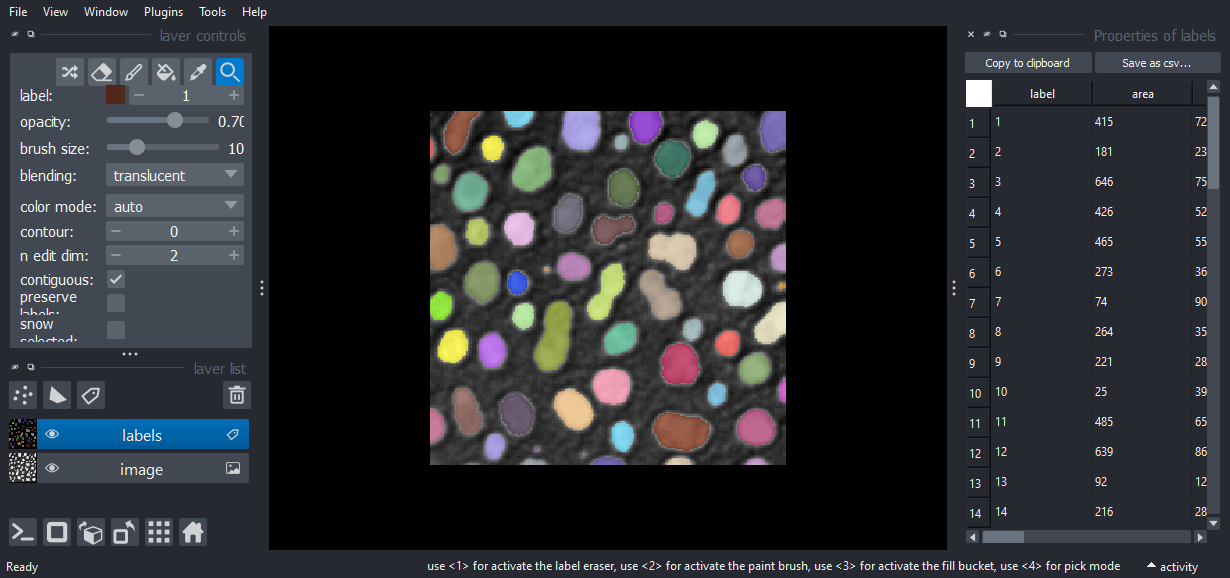

In [5]:
viewer = napari.Viewer()
viewer.add_image(image)
labels_layer = viewer.add_labels(labels)
labels_layer.properties = statistics

table_widget = nsr.add_table(labels_layer, viewer)

napari.utils.nbscreenshot(viewer)

In [6]:
table_widget.hide()

## Controlling the plotter
Next we add a widget for Plotting and control what's plotted.

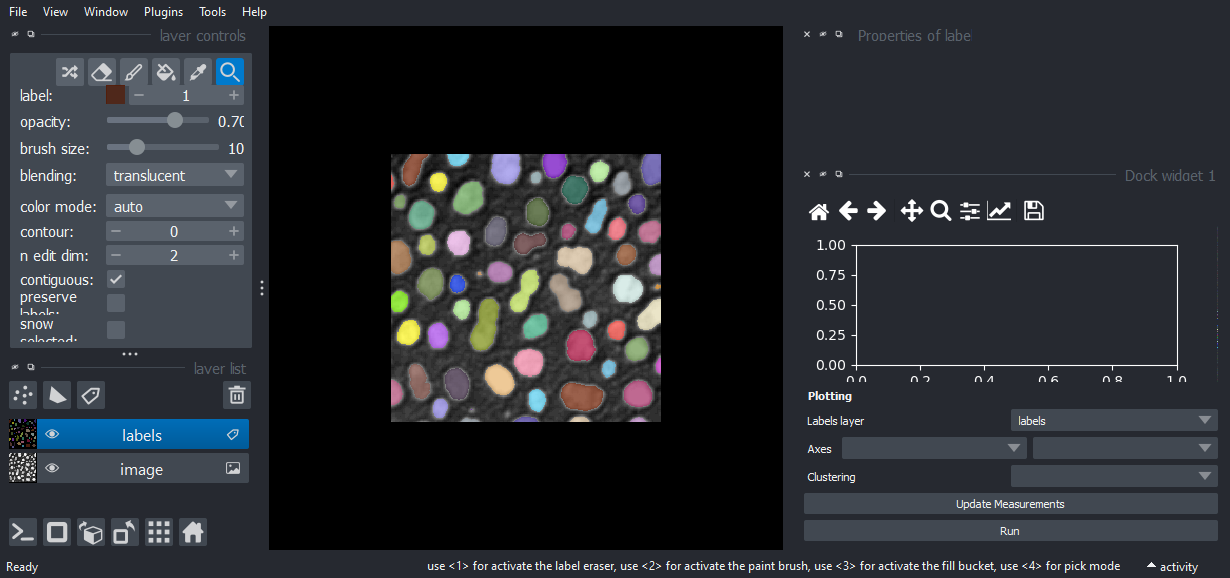

In [7]:
plotter_widget = PlotterWidget(viewer)
plotter_dock_widget = viewer.window.add_dock_widget(plotter_widget)

napari.utils.nbscreenshot(viewer)

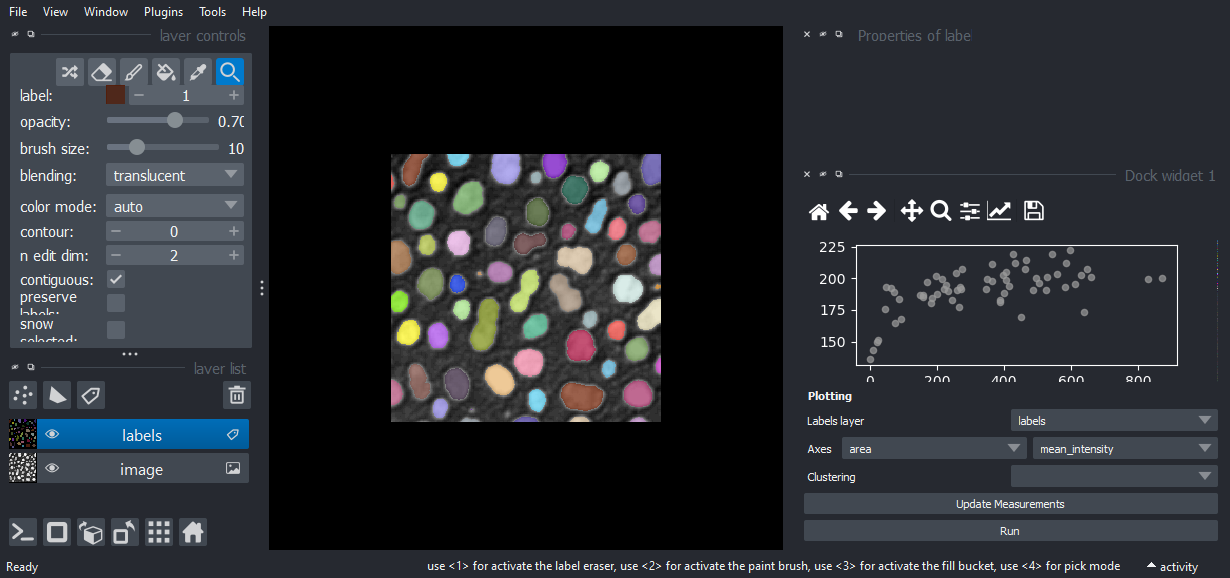

In [8]:
plotter_widget.plot_x_axis.setCurrentText("area")
plotter_widget.plot_y_axis.setCurrentText("mean_intensity")

# workaround to click run button programmatically
layout = plotter_widget.layout()
widgetitem = layout.itemAt(layout.count()-2)
run_button = widgetitem.widget().layout().itemAt(0).widget()
run_button.clicked.emit()

napari.utils.nbscreenshot(viewer)